In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggunlisnawati","key":"2fd936da184e16575dc804c6e1f3e948"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
100% 67.4k/67.4k [00:00<00:00, 491kB/s]
100% 67.4k/67.4k [00:00<00:00, 489kB/s]


In [4]:
!mkdir stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip -d stroke-prediction-dataset
!ls stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
  inflating: stroke-prediction-dataset/healthcare-dataset-stroke-data.csv  
healthcare-dataset-stroke-data.csv


In [5]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [6]:
df = pd.read_csv("/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df=df.dropna()

In [8]:
df.drop(columns=['id'], inplace=True)

In [9]:
smoking_status = pd.get_dummies(df.smoking_status)
df_baru = pd.concat([df, smoking_status], axis=1)
df_baru = df_baru.drop(columns='smoking_status')
df_baru

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,False,True,False,False
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,False,False,True,False
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,False,False,False,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,False,False,True,False
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,0,True,False,False,False
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,False,False,True,False
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,False,False,True,False
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0,False,True,False,False


In [10]:
df.gender[df.gender == 'Male'] = 0
df.gender[df.gender == 'Female'] = 1
df.ever_married[df.ever_married == 'No'] = 0
df.ever_married[df.ever_married == 'Yes'] = 1
df.work_type[df.work_type == 'Never_worked'] = 0
df.work_type[df.work_type == 'Govt_job'] = 1
df.work_type[df.work_type == 'Private'] = 2
df.work_type[df.work_type == 'Self-employed'] = 3
df.work_type[df.work_type == 'children'] = 4
df.smoking_status[df.smoking_status == 'Unknown'] = 0
df.smoking_status[df.smoking_status == '  '] = 1
df.smoking_status[df.smoking_status == 'never smoked'] = 2
df.smoking_status[df.smoking_status == 'smokes'] = 3
df.Residence_type[df.Residence_type == 'Urban'] = 0
df.Residence_type[df.Residence_type == 'Rural'] = 1
df.head()

<ipython-input-10-3477d3da9c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == 'Male'] = 0
<ipython-input-10-3477d3da9c36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == 'Female'] = 1
<ipython-input-10-3477d3da9c36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ever_married[df.ever_married == 'No'] = 0
<ipython-input-10-3477d3da9c36>:4: SettingWithCopyWarning: 
A value is trying t

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,0,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,2,1,105.92,32.5,2,1
3,1,49.0,0,0,1,2,0,171.23,34.4,3,1
4,1,79.0,1,0,1,3,1,174.12,24.0,2,1
5,0,81.0,0,0,1,2,0,186.21,29.0,formerly smoked,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 589.3+ KB


In [12]:
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')
df['gender'].fillna(0, inplace=True)
df['ever_married'] = pd.to_numeric(df['ever_married'], errors='coerce')
df['ever_married'].fillna(0, inplace=True)
df['work_type'] = pd.to_numeric(df['work_type'], errors='coerce')
df['work_type'].fillna(0, inplace=True)
df['Residence_type'] = pd.to_numeric(df['Residence_type'], errors='coerce')
df['Residence_type'].fillna(0, inplace=True)
df['smoking_status'] = pd.to_numeric(df['smoking_status'], errors='coerce')
df['smoking_status'].fillna(0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   float64
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   float64
 10  stroke             4909 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 589.3 KB


In [14]:
X = df.drop("stroke", axis=1)
Y = df["stroke"]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.003)

In [16]:
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [72]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                352       
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

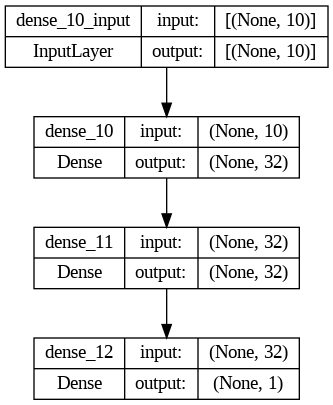

In [75]:
plot_model(model, show_shapes = True)

In [76]:
model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
490/490 [==============================] - 1s 1ms/step - loss: 0.3229 - accuracy: 0.9512
Epoch 2/50
490/490 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9573
Epoch 3/50
490/490 [==============================] - 1s 1ms/step - loss: 0.1785 - accuracy: 0.9575
Epoch 4/50
490/490 [==============================] - 1s 1ms/step - loss: 0.1744 - accuracy: 0.9575
Epoch 5/50
490/490 [==============================] - 1s 1ms/step - loss: 0.1716 - accuracy: 0.9575
Epoch 6/50
490/490 [==============================] - 1s 2ms/step - loss: 0.1707 - accuracy: 0.9575
Epoch 7/50
490/490 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9575
Epoch 8/50
490/490 [==============================] - 1s 2ms/step - loss: 0.1715 - accuracy: 0.9575
Epoch 9/50
490/490 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9575
Epoch 10/50
490/490 [==============================] - 1s 2ms/step - loss: 0.1709 - accuracy: 0.9575

In [86]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.2122 - accuracy: 0.9333


[0.2121841162443161, 0.9333333373069763]

In [52]:
model.save('./stroke.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
model = tf.keras.models.load_model('./stroke.h5')
conveter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = conveter.convert()
open('stroke.tflite', 'wb').write(tflite_model)

771088

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   float64
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   float64
 10  stroke             4909 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 589.3 KB


In [55]:
df.shape

(4909, 11)

In [89]:
predik= model.predict([[1.0,	79.0,	1,	0,	1,	3,	1,	174.12,	24.0,	2.0]])
print((predik))

1/1 [==============================] - 0s 61ms/step
[[0.22287785]]


In [32]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
346,0.0,68.0,0,0,1,2,1,116.23,26.1,2.0,0
